<a href="https://colab.research.google.com/github/Communist02/BIN-22-1_Mazur_Denis_ML/blob/master/%D0%94%D0%97_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas scikit-learn nltk pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 43.4 MB/s eta 0:00:00


In [2]:
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pymorphy3 import MorphAnalyzer
import math

nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')


class Processing:
    def tokenize(self, text: str) -> list[str]:
        return word_tokenize(text)

    def lematize(self, tokens: list[str]) -> list[str]:
        morph3 = MorphAnalyzer()
        lemmatized_words = [morph3.parse(
            word)[0].normal_form for word in tokens]
        return lemmatized_words

    def stemming(self, tokens: list[str]) -> list[str]:
        stemmer = SnowballStemmer("english")
        lemmatized_words = [stemmer.stem(word) for word in tokens]
        return lemmatized_words

    def vectorize(self, tokens: list[str]) -> list[int]:
        dict_vectors = {}
        result = []
        for word in tokens:
            if word in dict_vectors.keys():
                result.append(dict_vectors[word])
            else:
                dict_vectors[word] = len(dict_vectors)
                result.append(dict_vectors[word])
        return result

    def vectorize_dict(self, tokens: list[str]) -> list[int]:
        dict_vectors = {}
        for word in tokens:
            if word not in dict_vectors.keys():
                dict_vectors[word] = len(dict_vectors)
        return dict_vectors

    def delete_stop_words(self, tokens: list[str]) -> list[int]:
        stop_words = set(stopwords.words('english')).union(
            ['.', ',', ':', '?', '!', '(', ')'])
        return [word for word in tokens if word not in stop_words]

    def bag_of_words(self, tokens: list[str]) -> dict[str]:
        dict_words = {}
        for word in tokens:
            dict_words[word] = dict_words.setdefault(word, 0) + 1
        return dict_words

    def tf(self, tokens: list[str]) -> dict[str]:
        dict_words = self.bag_of_words(tokens)
        for word in dict_words:
            dict_words[word] /= len(tokens)
        return dict_words

    def idf(self, texts: list[list[str]]) -> dict[str]:
        dict_words = {}
        big_text = []
        for text in texts:
            big_text += list(set(text))
        for word in set(big_text):
            dict_words[word] = math.log(len(texts) / big_text.count(word))
        return dict_words

    def tf_idf(self, texts: list[list[str]], indexText: int) -> dict[str]:
        tf = self.tf(texts[indexText])
        idf = self.idf(texts)
        dict_words = {}
        for word in tf:
            dict_words[word] = tf[word] * idf[word]
        return dict_words

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# The AG News Corpus is a popular dataset commonly used for text classification tasks in Natural Language Processing (NLP). It consists of news articles collected from the AG's corpus of news articles on the web, categorized into four classes: World, Sports, Business, and Science/Technology. Each article is accompanied by a title and a short description, making it suitable for tasks like topic classification and sentiment analysis. With its diverse range of topics and well-labeled categories, the AG News Corpus serves as a valuable resource for training and evaluating machine learning models in various NLP applications.

# Description:

# Dataset: AG News Corpus
# Source: AG's corpus of news articles on the web.
# Content: News articles categorized into World, Sports, Business, and Science/Technology.
# Labels: Four class labels representing different news categories.
# Scope: Covers a broad range of current events and topics.
# Size: Typically contains thousands of articles.
# Language: Primarily in English.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('train.csv')
df = df.head(10000)
pc = Processing()

y = df['Class Index']
x = df.copy().drop('Class Index', axis=1)

In [16]:
df

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
9995,4,Winamp flaw: Digital attacks use skins for cam...,Users of the music player should watch out for...
9996,4,BMC adds PeopleSoft management,BMC Software has released a new version of Pat...
9997,3,CAO chief faces Singapore probe,The chief of Beijing-backed China Aviation Oil...
9998,3,A Microsoft deal gets full EU inquiry,BRUSSELS The European Commission has opened an...


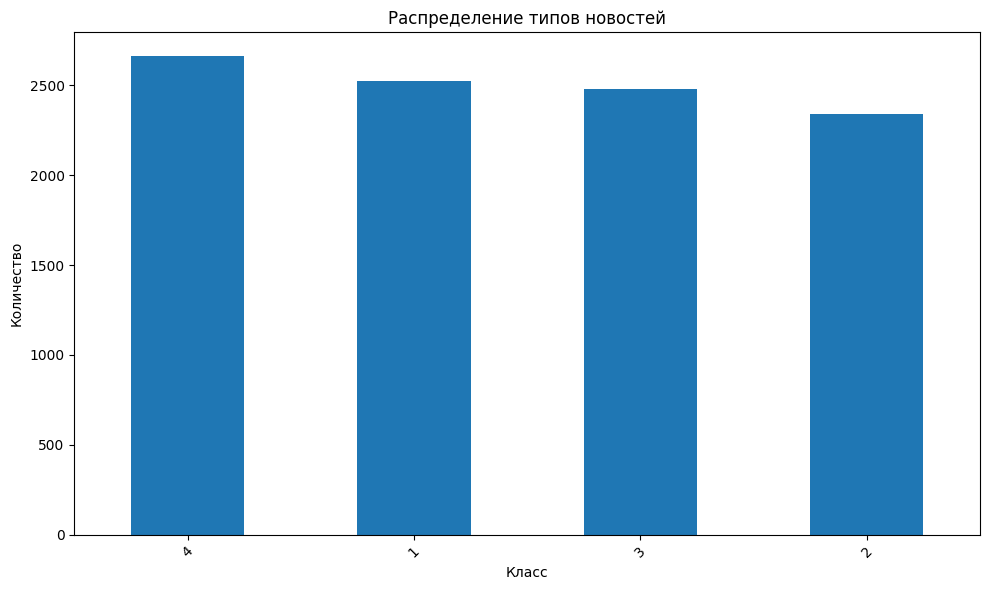

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['Class Index'].value_counts().plot(kind='bar')
plt.title('Распределение типов новостей')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
for index, row in df.iterrows():
    text = row['Title']
    tokens = pc.tokenize(text)  # Токенизация
    tokens = pc.delete_stop_words(tokens)  # Удаление стоп слов

    row['Title'] = ' '.join(tokens)

    text = row['Description']
    tokens = pc.tokenize(text)  # Токенизация
    tokens = pc.delete_stop_words(tokens)  # Удаление стоп слов

    row['Description'] = ' '.join(tokens)

Векторизация через TFIDF

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Description'])

Кластеризация с помощью Spectral Clustering

In [46]:
from sklearn.preprocessing import StandardScaler

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.toarray())

In [47]:
from sklearn.cluster import SpectralClustering

In [59]:
spectral = SpectralClustering(
    n_clusters=4,
    affinity='nearest_neighbors',
    n_neighbors=10,
    random_state=42
)
labels = spectral.fit_predict(X_scaled)

Визуализация

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

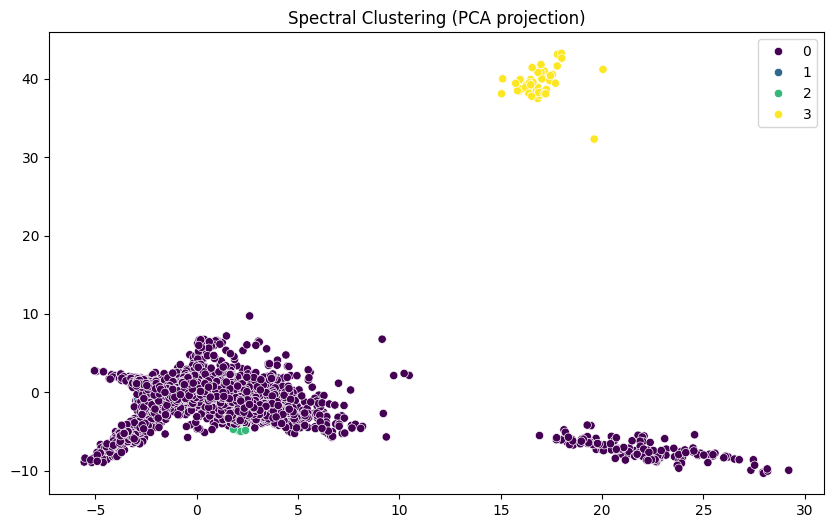

In [61]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=labels,
    palette='viridis',
    legend='full'
)
plt.title('Spectral Clustering (PCA projection)')
plt.show()

In [62]:
from sklearn.metrics import silhouette_score

if len(set(labels)) > 1:
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {score:.3f}")
else:
    print("Все точки в одном кластере!")

# Анализ результатов
df['cluster'] = labels
for cluster in sorted(df['cluster'].unique()):
    print(f"\n Кластер {cluster}:")
    print(df[df['cluster'] == cluster]['Class Index'].value_counts().head(5))

Silhouette Score: -0.034

 Кластер 0:
Class Index
0     9724
15      25
13      23
18      20
6       16
Name: count, dtype: int64

 Кластер 1:
Class Index
1    19
Name: count, dtype: int64

 Кластер 2:
Class Index
11    11
Name: count, dtype: int64

 Кластер 3:
Class Index
12    45
Name: count, dtype: int64


In [63]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)